Generation 0 - Chosen Path: ['A', 'B', 'E', 'D', 'C'], Attacked Node: A, Dropped Node: A, Shortest Path Length: 18.0


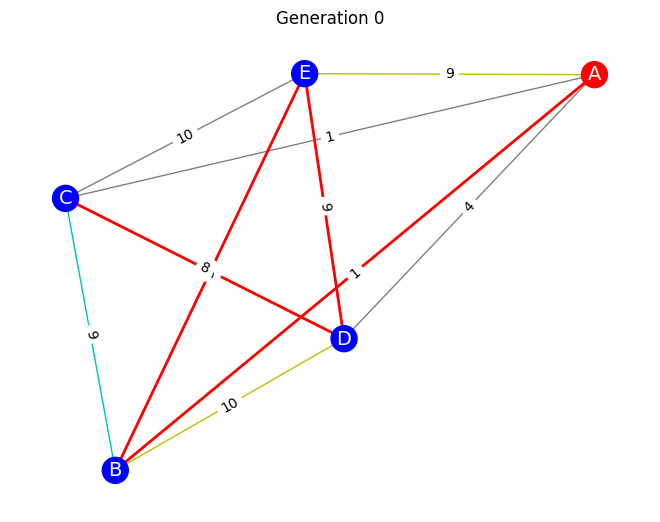

Generation 1 - Chosen Path: ['D', 'B', 'E', 'A', 'C'], Attacked Node: A, Dropped Node: A, Shortest Path Length: 17.0


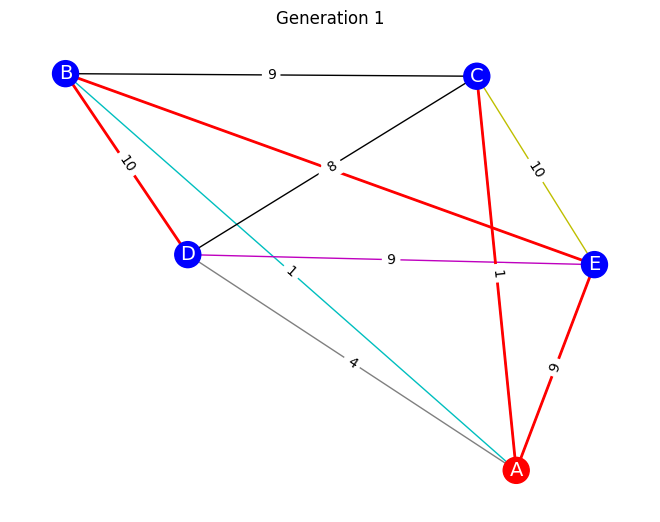

Generation 2 - Chosen Path: ['D', 'B', 'E', 'A', 'C'], Attacked Node: A, Dropped Node: A, Shortest Path Length: 17.0


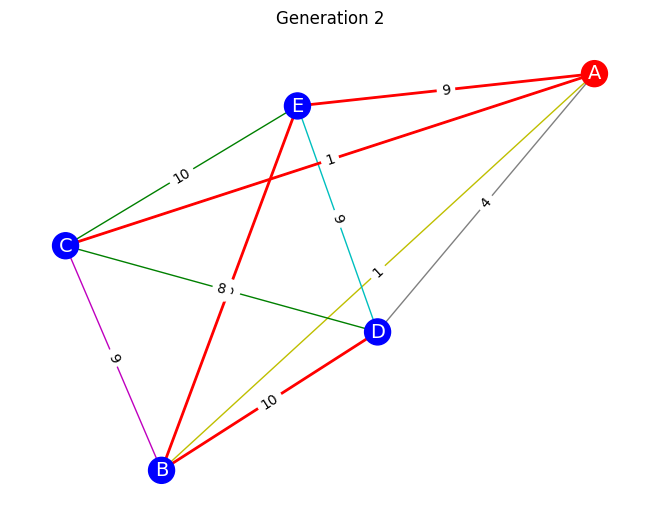

Generation 3 - Chosen Path: ['B', 'E', 'C', 'A', 'D'], Attacked Node: A, Dropped Node: A, Shortest Path Length: 16.0


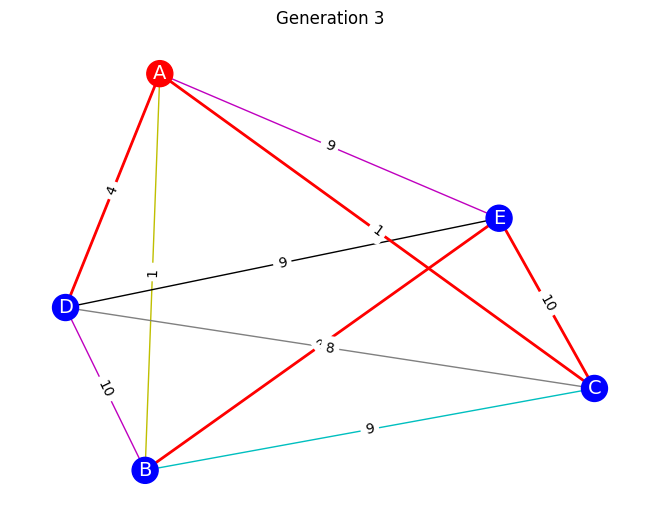

Generation 4 - Chosen Path: ['A', 'D', 'C', 'B', 'E'], Attacked Node: A, Dropped Node: A, Shortest Path Length: 18.0


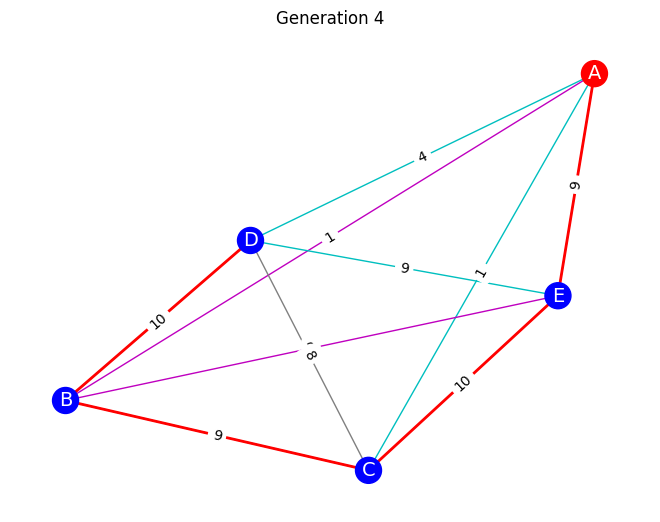

Generation 5 - Chosen Path: ['D', 'B', 'E', 'A', 'C'], Attacked Node: A, Dropped Node: A, Shortest Path Length: 17.0


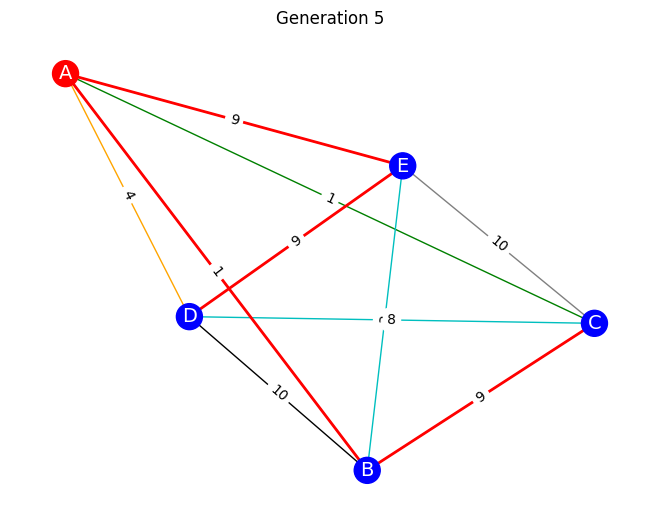

Generation 6 - Chosen Path: ['D', 'B', 'E', 'A', 'C'], Attacked Node: A, Dropped Node: A, Shortest Path Length: 17.0


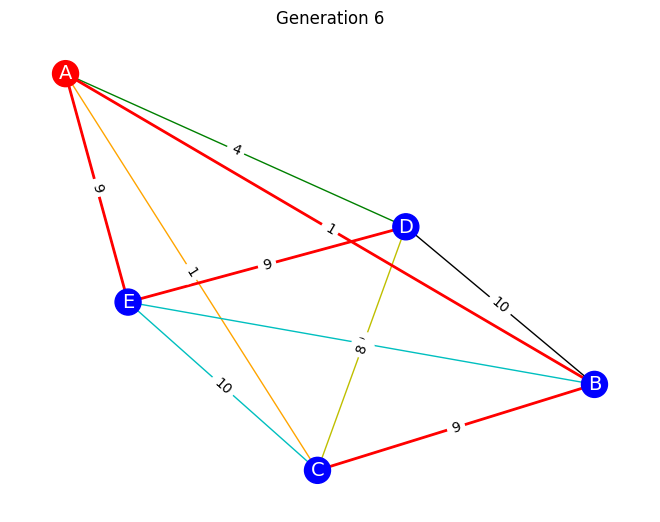

Generation 7 - Chosen Path: ['D', 'C', 'E', 'A', 'B'], Attacked Node: A, Dropped Node: A, Shortest Path Length: 20.0


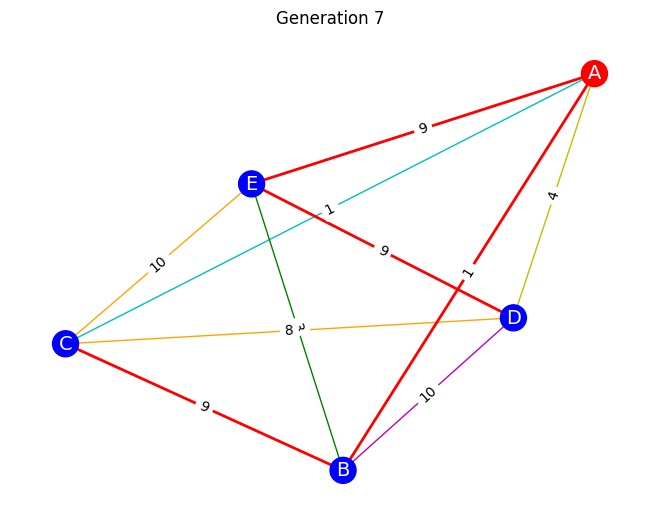

Generation 8 - Chosen Path: ['B', 'E', 'A', 'D', 'C'], Attacked Node: A, Dropped Node: A, Shortest Path Length: 16.0


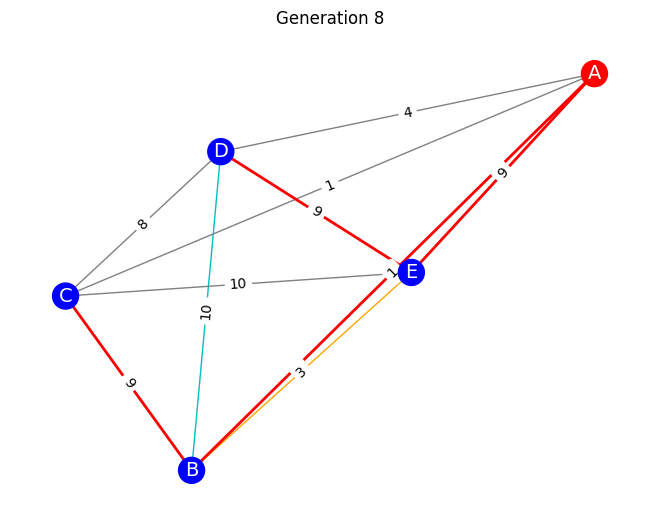

Generation 9 - Chosen Path: ['B', 'E', 'A', 'C', 'D'], Attacked Node: A, Dropped Node: A, Shortest Path Length: 17.0


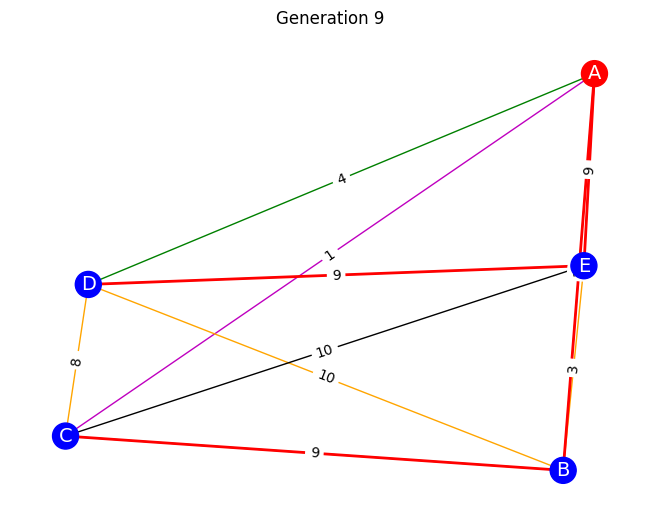

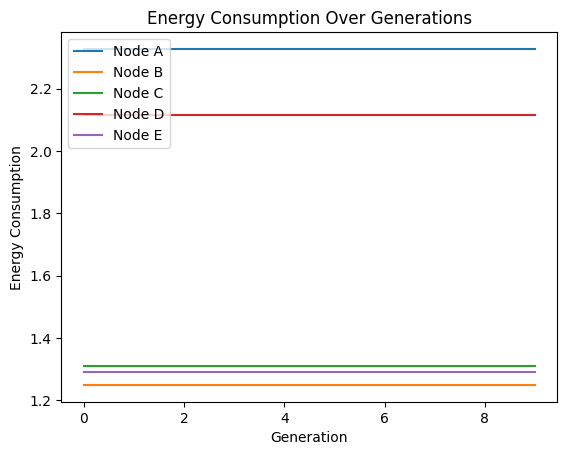

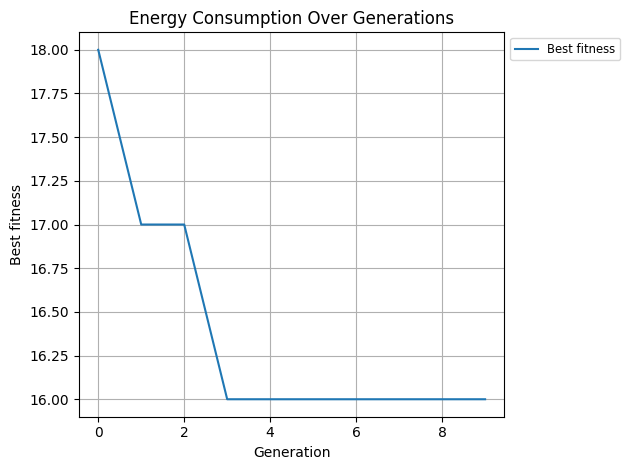

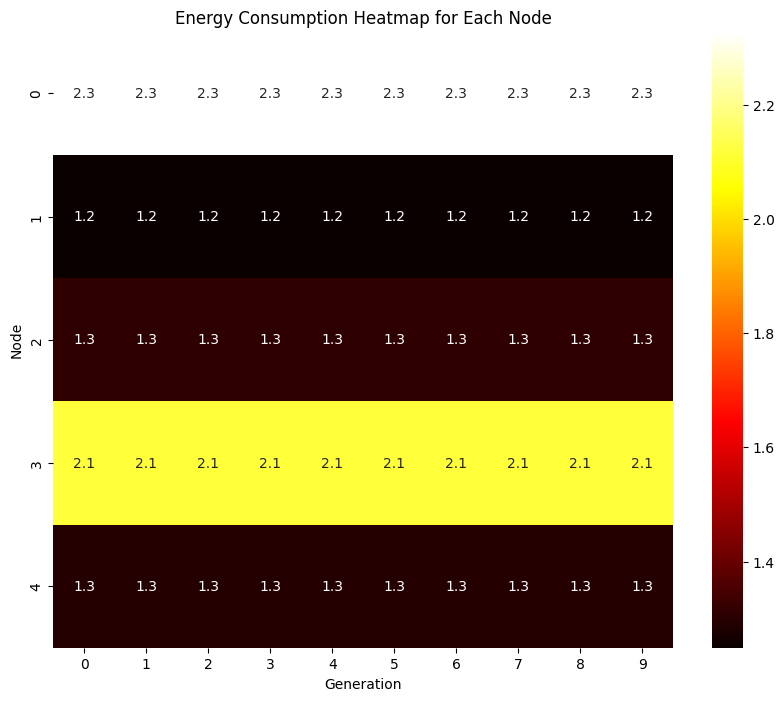

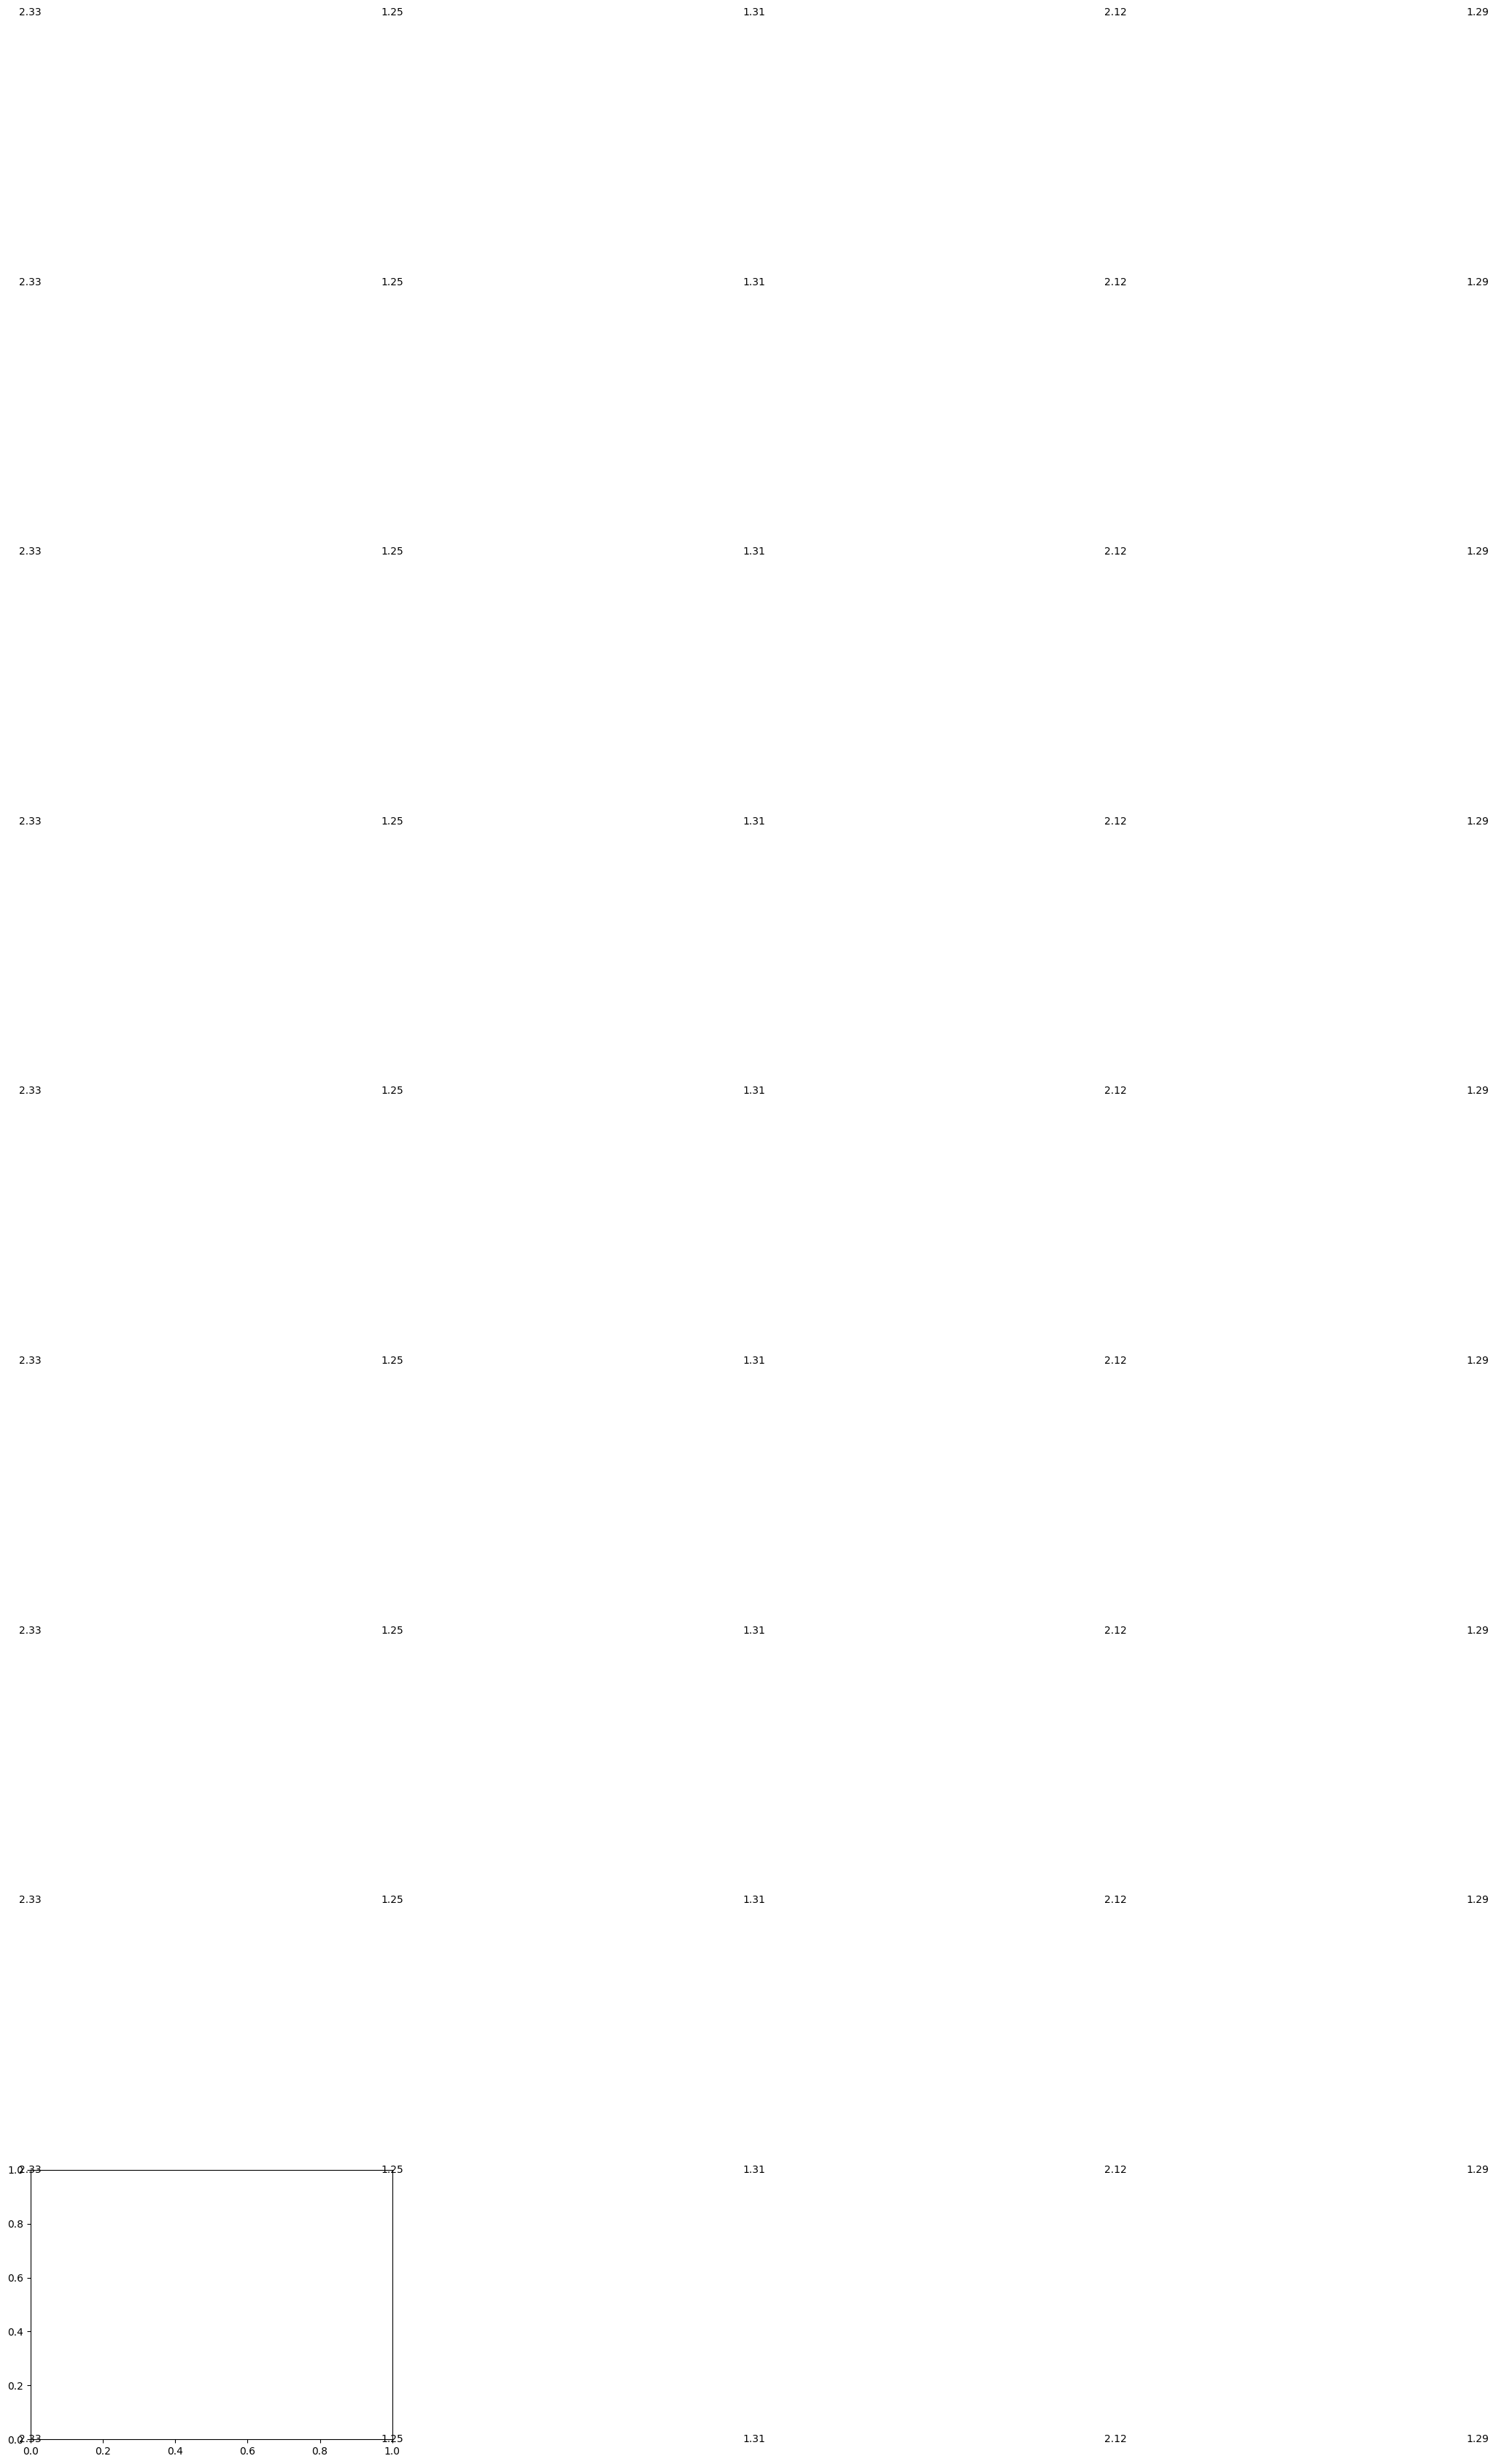

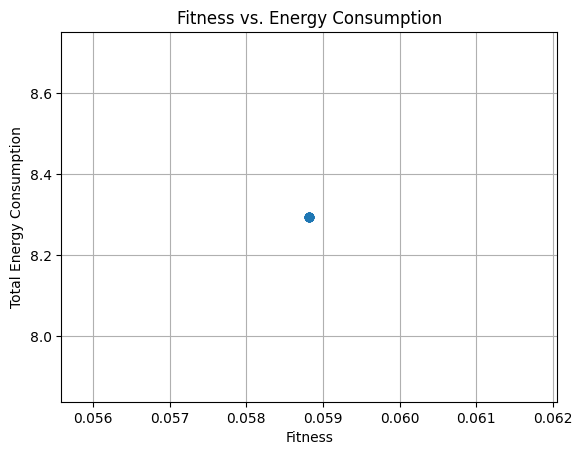

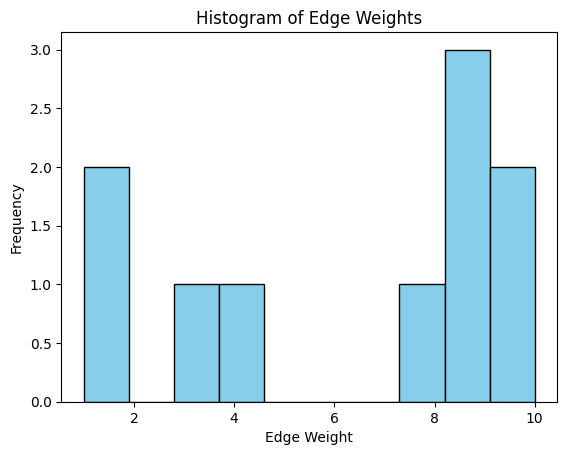

Best Path: ['B', 'E', 'A', 'C', 'D']
Shortest Path Length: 17.0
CPU Time: 3.1920042037963867 seconds
Average Energy Consumption: 1.6589313032030661


In [2]:
#test case 1
import random
import networkx as nx
import matplotlib.pyplot as plt
import time
import seaborn as sns

# Define Parameters
num_nodes = 5
node_labels = ['A', 'B', 'C', 'D', 'E']
num_employed_bees = 8
num_onlooker_bees = 8
num_scout_bees = 4
max_trials = 10
population_size = num_employed_bees + num_onlooker_bees + num_scout_bees

# Initialize the network graph as an adjacency matrix
network = [[random.randint(1, 10) if i != j else 0 for i in range(num_nodes)] for j in range(num_nodes)]

# Energy consumption data for each node
energy_consumption = [random.uniform(0.5, 2.5) for _ in range(num_nodes)]

# Simulate a black hole attack by removing an edge from the attacked node
attacked_node = random.randint(0, num_nodes - 1)
dropped_node = attacked_node
network[attacked_node][dropped_node] = 0
network[dropped_node][attacked_node] = 0  # Set the adjacency value for the dropped node to 0

# Define Functions

def initialize_population(population_size, num_nodes):
    population = []
    for _ in range(population_size):
        path = node_labels.copy()
        random.shuffle(path)
        population.append(path)
    return population

def calculate_fitness(path, network):
    total_distance = 0
    for i in range(len(path) - 1):
        node1 = node_labels.index(path[i])
        node2 = node_labels.index(path[i + 1])
        if network[node1][node2] == 0:  # Check for a black hole attack
            return 0  # Set fitness to zero if a black hole attack is detected
        total_distance += network[node1][node2]
    return 1 / total_distance

def employed_bees_phase(population, network):
    selected_parents = []
    for _ in range(num_employed_bees):
        path = random.choice(population)
        new_path = mutate(path)
        if calculate_fitness(new_path, network) > calculate_fitness(path, network):
            selected_parents.append(new_path)
        else:
            selected_parents.append(path)
    return selected_parents

def onlooker_bees_phase(employed_bees, network):
    total_fitness = sum(calculate_fitness(path, network) for path in employed_bees)
    selected_parents = []
    for _ in range(num_onlooker_bees):
        r = random.uniform(0, total_fitness)
        cumulative_fitness = 0
        for path in employed_bees:
            cumulative_fitness += calculate_fitness(path, network)
            if cumulative_fitness >= r:
                new_path = mutate(path)
                if calculate_fitness(new_path, network) > calculate_fitness(path, network):
                    selected_parents.append(new_path)
                else:
                    selected_parents.append(path)
                break
    return selected_parents

def scout_bees_phase(population, network):
    new_population = population.copy()
    while len(new_population) < population_size:
        path = node_labels.copy()
        random.shuffle(path)
        if path not in new_population:
            new_population.append(path)
    return new_population

def mutate(path):
    i, j = random.sample(range(len(path)), 2)
    path[i], path[j] = path[j], path[i]
    return path

# Main Algorithm Loop
population = initialize_population(population_size, num_nodes)

# List to store energy consumption for each node in each generation
energy_consumption_data = [[] for _ in range(num_nodes)]

# List to store the best fitness value for each generation
best_fitness_data = []

# Initialize best_path
best_path = population[0]
best_fitness = calculate_fitness(best_path, network)

# Measure CPU time
start_time = time.time()

# Iterating over generations
for generation in range(max_trials):
    # Employed bees phase
    employed_bees = employed_bees_phase(population, network)

    # Onlooker bees phase
    onlooker_bees = onlooker_bees_phase(employed_bees, network)

    # Scout bees phase
    population = scout_bees_phase(onlooker_bees, network)

    # Calculate energy consumption for the current generation
    for i in range(num_nodes):
        energy_consumption_data[i].append(energy_consumption[i])

    # Find the best path in the current population
    current_best_path = max(population, key=lambda path: calculate_fitness(path, network))
    current_best_fitness = calculate_fitness(current_best_path, network)
    best_path = current_best_path if current_best_fitness > best_fitness else best_path
    best_fitness = max(current_best_fitness, best_fitness)
    best_fitness_data.append(best_fitness)

    # Print the chosen path, attacked node, dropped node, and path length for this iteration
    print(f"Generation {generation} - Chosen Path: {current_best_path}, Attacked Node: {node_labels[attacked_node]}, Dropped Node: {node_labels[dropped_node]}, Shortest Path Length: {1 / current_best_fitness}")

    # Visualize the network graph
    # G = nx.Graph()
    # for i in range(num_nodes):
    #     for j in range(i + 1, num_nodes):
    #         if network[i][j] > 0:  # Add edges only if the weight is greater than 0
    #             G.add_edge(node_labels[i], node_labels[j], weight=network[i][j])

    # pos = nx.spring_layout(G)
    # labels = {(node_labels[i], node_labels[j]): network[i][j] for i in range(num_nodes) for j in range(i + 1, num_nodes) if network[i][j] > 0}
    # edge_colors = []
    # for i in range(num_nodes):
    #     for j in range(i + 1, num_nodes):
    #         if network[i][j] > 0:
    #             shortest_path = nx.shortest_path(G, source=node_labels[i], target=node_labels[j])
    #             if current_best_path == shortest_path or current_best_path[::-1] == shortest_path:
    #                 edge_colors.append('cyan')  # Color shortest paths in cyan (CMYK model)
    #             else:
    #                 # Generate random RGB colors for each edge
    #                 edge_color = (random.random(), random.random(), random.random())
    #                 edge_colors.append(edge_color)
    #         else:
    #             edge_colors.append('red')

    # node_colors = ['red' if i == attacked_node else 'blue' for i in range(num_nodes)]  # Color the attacked node in red
    # nx.draw(G, pos, with_labels=True, node_size=350, node_color=node_colors, edge_color=edge_colors)
    # nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

    # Highlight the nodes with edges adjacent to the attacked node
    # adjacent_edges = [edge for edge in G.edges() if attacked_node in edge]
    # nx.draw_networkx_nodes(G, pos, nodelist=[node for edge in adjacent_edges for node in edge], node_color='green', node_size=350)


    # Create the network graph
    G = nx.Graph()
    for i in range(num_nodes):
        for j in range(i + 1, num_nodes):
            if network[i][j] > 0:  # Add edges only if the weight is greater than 0
                G.add_edge(node_labels[i], node_labels[j], weight=network[i][j])

    # Plot the network graph
    pos = nx.spring_layout(G)
    labels = {(node_labels[i], node_labels[j]): network[i][j] for i in range(num_nodes) for j in range(i + 1, num_nodes) if network[i][j] > 0}
    node_colors = ['r' if i == attacked_node else 'b' for i in range(num_nodes)]
    edge_colors = [random.choice(['g', 'grey', 'orange', 'c', 'y', 'm', 'k']) for _ in range(len(G.edges))]

    nx.draw(G, pos, with_labels=True, node_size=350, node_color=node_colors, edge_color=edge_colors, font_color='white', font_size=14)
    nx.draw_networkx_edges(G, pos, edgelist=[(best_path[i], best_path[i+1]) for i in range(len(best_path)-1)], edge_color='r', width=2.0)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    plt.title(f'Generation {generation}')
    plt.show()


    # Change node label color to white
    # nx.draw_networkx_labels(G, pos, labels={node: node for node in G.nodes()}, font_color='white')
    # plt.title(f'Generation {generation}')
    # plt.show()

    # Highlight the best path in the network graph
    # best_path_edges = [(best_path[i], best_path[i+1]) for i in range(len(best_path)-1)]
    # plt.figure()
    # nx.draw(G, pos, with_labels=True, node_size=350, node_color=node_colors, edge_color=edge_colors)
    # nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    # nx.draw_networkx_edges(G, pos, edgelist=best_path_edges, edge_color='orange', width=2)
    # nx.draw_networkx_nodes(G, pos, nodelist=best_path, node_color='orange', node_size=350)
    # nx.draw_networkx_labels(G, pos, labels={node: node for node in G.nodes()}, font_color='white')
    # plt.title('Network Graph with Highlighted Best Path')
    # plt.show()

# Plot the energy consumption graph
plt.figure()
for i in range(num_nodes):
    plt.plot(range(max_trials), energy_consumption_data[i], label=f'Node {node_labels[i]}')
plt.xlabel('Generation')
plt.ylabel('Energy Consumption')
plt.legend(loc='upper left')
plt.title('Energy Consumption Over Generations')
plt.show()

# Plot the convergence graph with shortest path length
plt.figure()
shortest_path_lengths = [1 / fitness for fitness in best_fitness_data]  # Calculate shortest path lengths
plt.plot(range(max_trials), shortest_path_lengths, label='Best fitness')
plt.xlabel('Generation')
plt.ylabel('Best fitness')
plt.legend(loc='upper left',bbox_to_anchor=(1,1),fontsize='small')
plt.title('Energy Consumption Over Generations')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot the energy consumption heatmap for each node
plt.figure(figsize=(10,8))
plt.title('Energy Consumption Heatmap for Each Node')
node_energy_data_transposed = list(map(list, zip(*energy_consumption_data)))
#heatmap = plt.imshow(node_energy_data_transposed, cmap='hot', interpolation='nearest')
sns.heatmap(energy_consumption_data, annot=True, cmap='hot')# xticklabels=max_trials, yticklabels=num_nodes)
#plt.colorbar(label='Energy Consumption')
plt.xlabel('Generation')
plt.ylabel('Node')
plt.show()

# Add the values inside the heatmap
for i in range(len(node_energy_data_transposed)):
    for j in range(len(node_energy_data_transposed[0])):
        plt.text(j, i, '{:.2f}'.format(node_energy_data_transposed[i][j]),
                 ha='center', va='center', color='black')

plt.show()

# Plot the fitness vs. energy consumption graph
fitness_values = []
total_energy_consumption = []

for generation in range(max_trials):
    generation_energy_consumption = [energy_consumption[i] for i in range(num_nodes)]
    total_energy_consumption.append(sum(generation_energy_consumption))

    current_best_path = max(population, key=lambda path: calculate_fitness(path, network))
    current_best_fitness = calculate_fitness(current_best_path, network)
    fitness_values.append(current_best_fitness)

plt.figure()
plt.plot(fitness_values, total_energy_consumption, marker='o', linestyle='-')
plt.xlabel('Fitness')
plt.ylabel('Total Energy Consumption')
plt.title('Fitness vs. Energy Consumption')
plt.grid(True)
plt.show()

# Plot the Histogram of Edge Weights
edge_weights = [network[i][j] for i in range(num_nodes) for j in range(i + 1, num_nodes) if network[i][j] > 0]
plt.hist(edge_weights, bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Edge Weight')
plt.ylabel('Frequency')
plt.title('Histogram of Edge Weights')
plt.show()

# Find the best path in the final population
best_path = max(population, key=lambda path: calculate_fitness(path, network))

# Calculate the fitness value for the best path in the final population
best_fitness_value = calculate_fitness(best_path, network)

# Print the best path, its length, and the fitness value
print("Best Path:", best_path)
print("Shortest Path Length:", 1 / best_fitness_value)

# Measure and print CPU time
end_time = time.time()
cpu_time = end_time - start_time
print("CPU Time:", cpu_time, "seconds")

# Calculate and print average energy consumption
avg_energy_consumption = sum(sum(data) for data in energy_consumption_data) / (num_nodes * max_trials)
print("Average Energy Consumption:", avg_energy_consumption)